In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [26]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [27]:
df.describe(include='object')

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


In [28]:
df['rate']=df['rate'].apply(lambda x: float(x[:-2]) if type(x) == str and '/' in x else np.nan)

In [29]:
for i in ['name','dish_liked','cuisines']:
    a=df[i].value_counts()
    b=a[a>25].index
    df[i]=df[i].apply(lambda x:x if x in b else 'others')

In [30]:
df.describe(include='object')

,url,address,name,online_order,book_table,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,50509,51696,51490,51717,51717,51371,51717,51717,51717,51717
unique,51717,11495,167,2,2,14926,93,93,15,272,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,others,Yes,No,080 43334321,BTM,Quick Bites,others,others,300,[],[],Delivery,BTM
freq,1,128,45096,30444,45268,216,5124,19132,50948,16795,7576,7595,39617,25942,3279


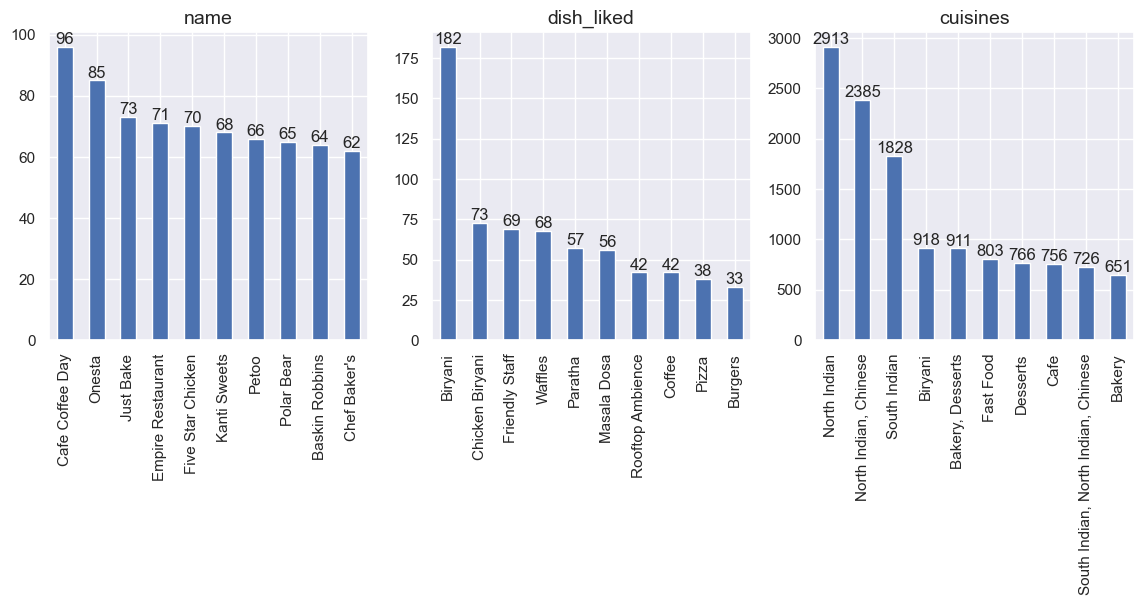

In [31]:
sns.set(rc={'figure.figsize':(14,4)})
p=1
for i in ['name','dish_liked','cuisines']:
    plt.subplot(1,3,p)
    ax=df[i].value_counts().iloc[1:11].plot(kind='bar')
    for j in ax.containers:
        ax.bar_label(j)
    plt.title(i,fontsize=14)
    p+=1

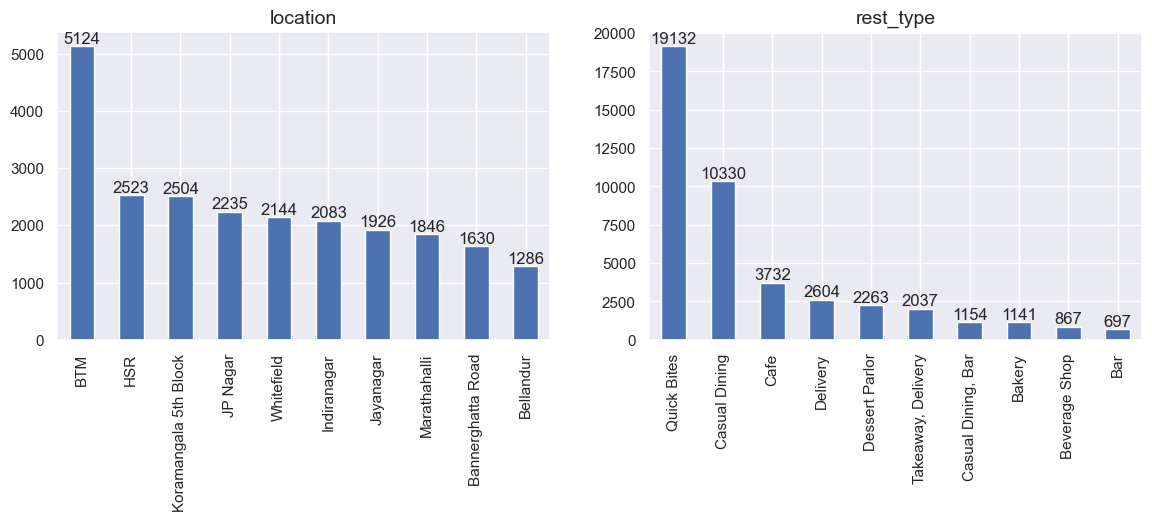

In [32]:
sns.set(rc={'figure.figsize':(14,4)})
p=1
for i in ['location','rest_type']:
    plt.subplot(1,2,p)
    ax=df[i].value_counts().head(10).plot(kind='bar')
    for j in ax.containers:
        ax.bar_label(j)
    plt.title(i,fontsize=14)
    p+=1

In [33]:
df.rename(columns={'approx_cost(for two people)':'price'},inplace=True)

In [34]:
df['price'].replace(',','',regex=True,inplace=True)

In [35]:
df['price']=df['price'].astype(np.number)

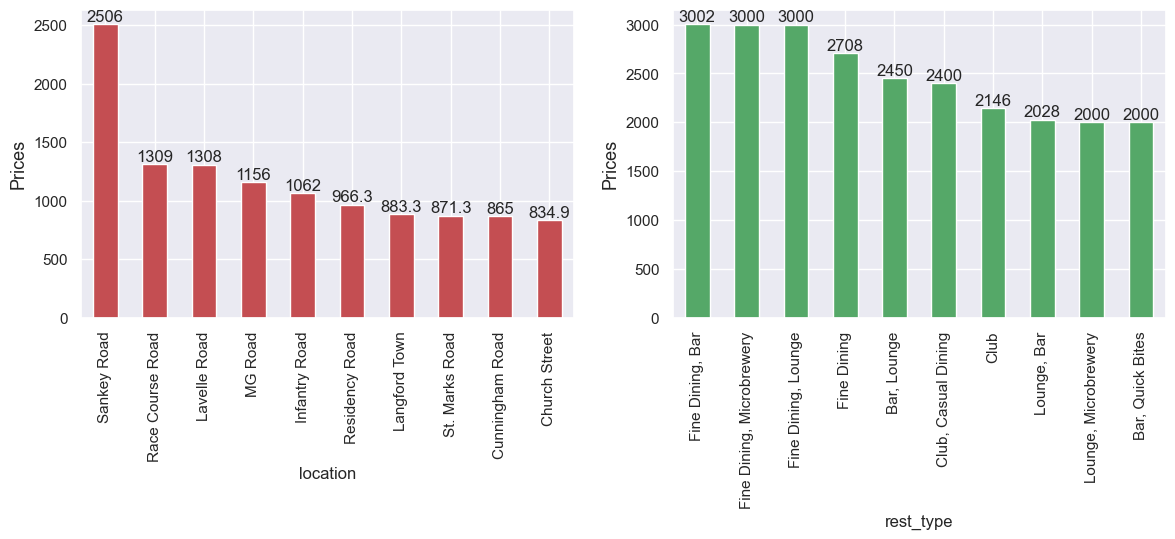

In [38]:
p=1
col=['r','g']
for i in ['location','rest_type']:
    plt.subplot(1,2,p)
    ax=df.groupby(i)['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color=col[p-1])
    for j in ax.containers:
        ax.bar_label(j,fmt='%0.4g')
    plt.ylabel('Prices',fontsize=13)
    p+=1

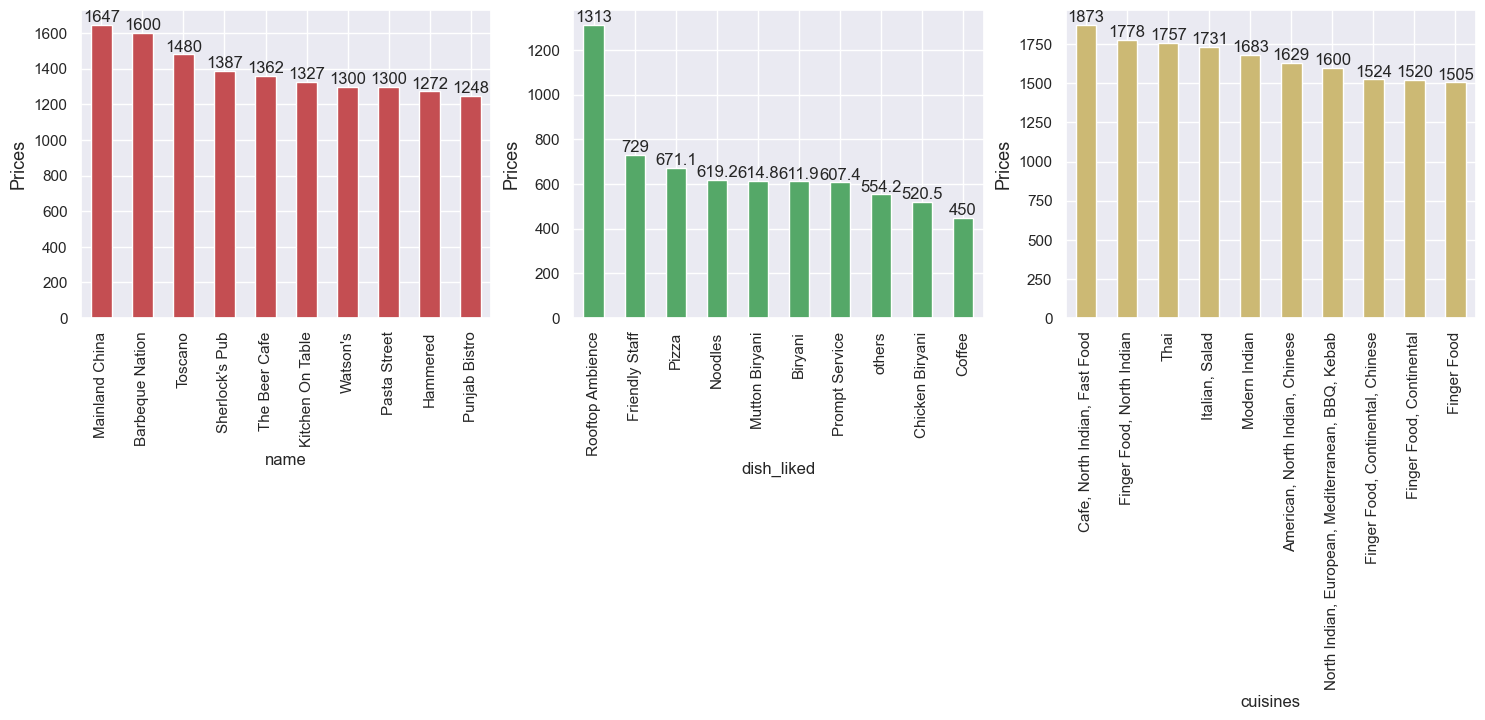

In [40]:
sns.set(rc={'figure.figsize':(18,4)})
p=1
col=['r','g','y']
for i in ['name','dish_liked','cuisines']:
    plt.subplot(1,3,p)
    ax=df.groupby(i)['price'].mean().sort_values(ascending=False).iloc[1:11].plot(kind='bar',color=col[p-1])
    for j in ax.containers:
        ax.bar_label(j,fmt='%0.4g')
    plt.ylabel('Prices',fontsize=13)
    p+=1

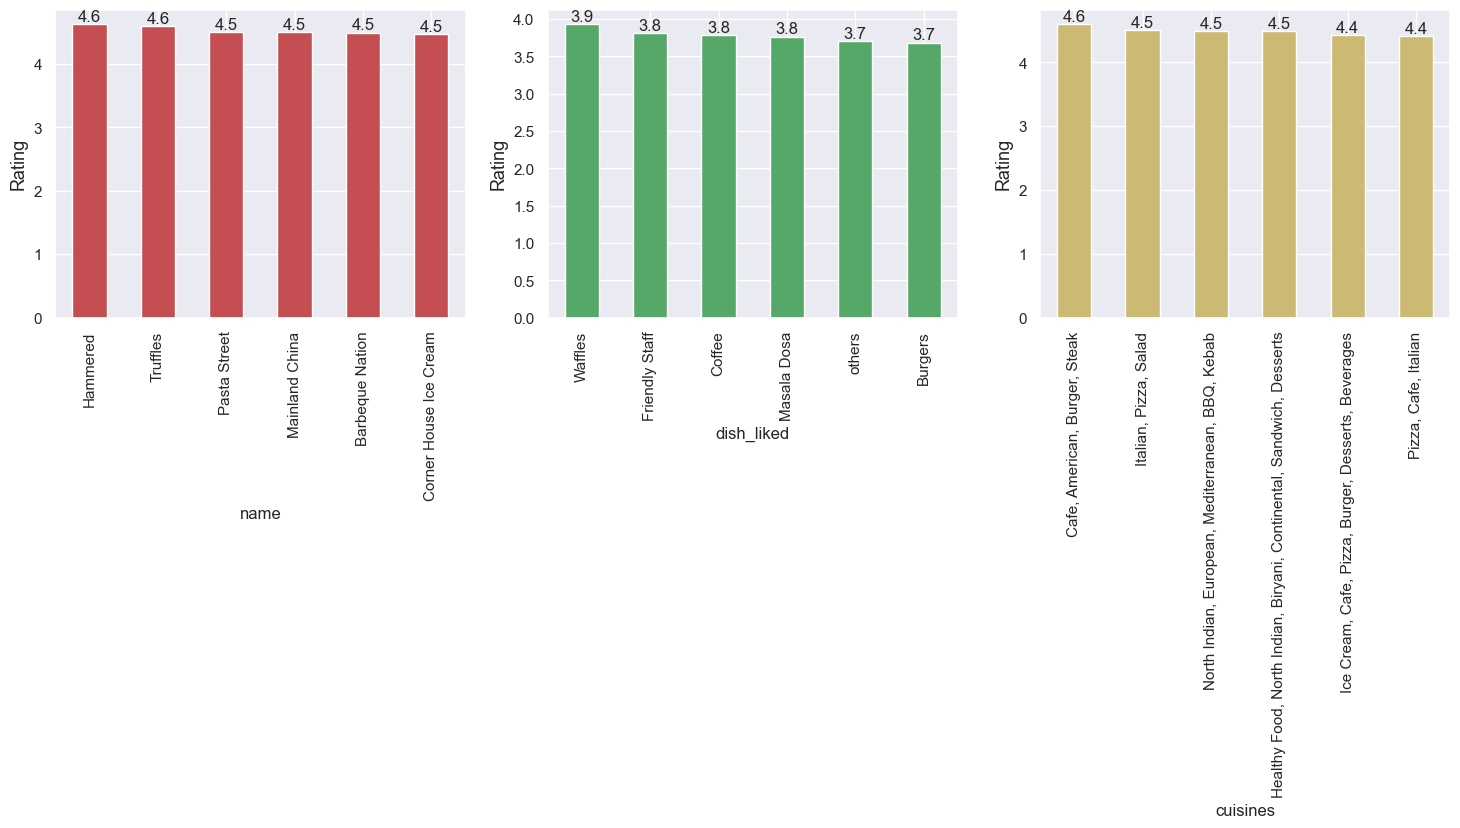

In [18]:
sns.set(rc={'figure.figsize':(18,4)})
p=1
col=['r','g','y']
for i in ['name','dish_liked','cuisines']:
    plt.subplot(1,3,p)
    ax=df.groupby(i)['rate'].mean().sort_values(ascending=False).iloc[1:7].plot(kind='bar',color=col[p-1])
    for j in ax.containers:
        ax.bar_label(j,fmt='%0.2g')
    plt.ylabel('Rating',fontsize=13)
    p+=1

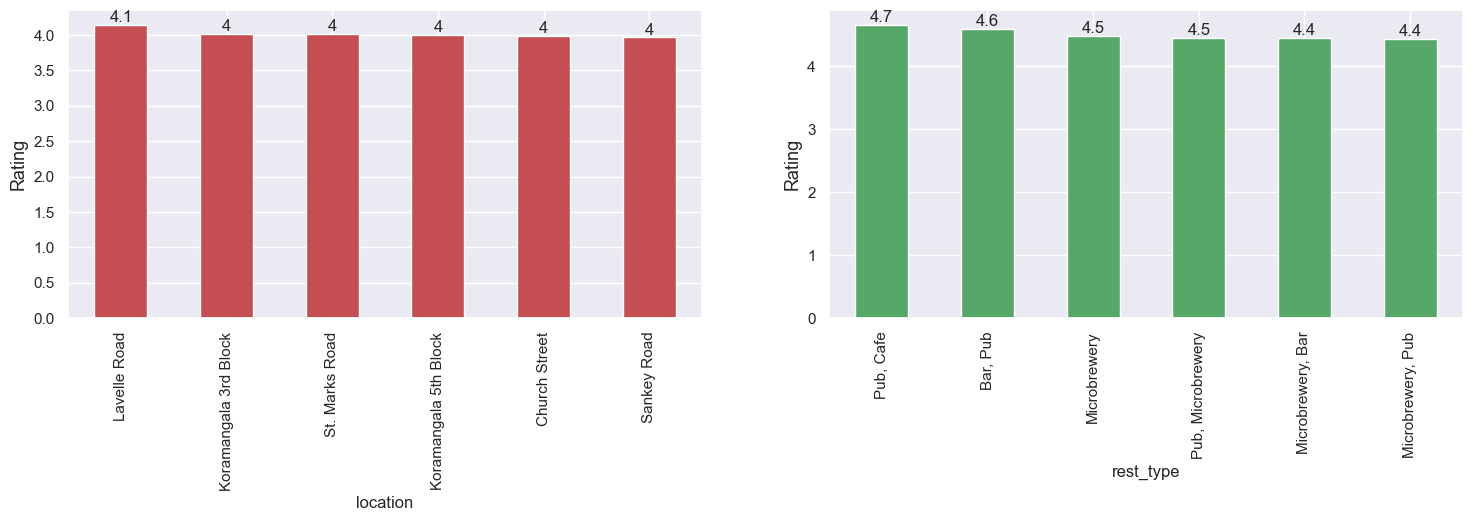

In [19]:
p=1
col=['r','g']
for i in ['location','rest_type']:
    plt.subplot(1,2,p)
    ax=df.groupby(i)['rate'].mean().sort_values(ascending=False).head(6).plot(kind='bar',color=col[p-1])
    for j in ax.containers:
        ax.bar_label(j,fmt='%0.2g')
    plt.ylabel('Rating',fontsize=13)
    p+=1